<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Customer_strore_segmentation_KMeans_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ingore any warning 
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Load dataset
df = pd.read_csv('/content/Stores.csv')
df.head(10)


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [50]:
# We ingnore noise data "Store ID"
df_store=df[['Store_Area','Items_Available','Daily_Customer_Count','Store_Sales']]

In [51]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


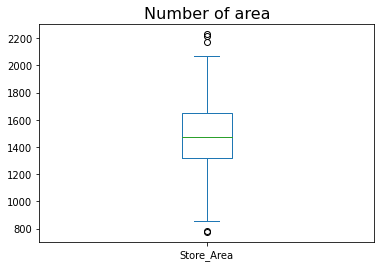

In [52]:
df_store['Store_Area'].plot(kind='box')
plt.title('Number of area', size=16)
plt.show()

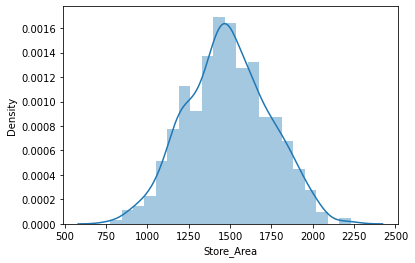

In [53]:
sns.distplot(df_store['Store_Area'])

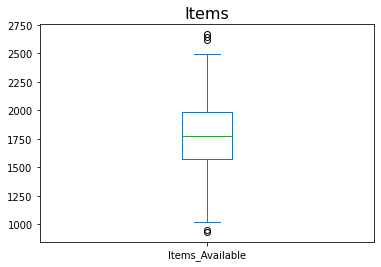

In [54]:
df_store['Items_Available'].plot(kind='box')
plt.title('Items', size=16)
plt.show()

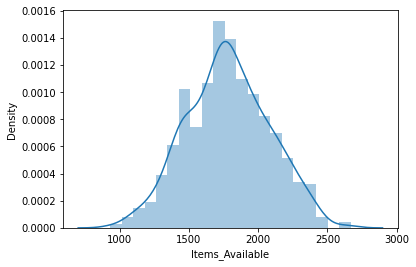

In [55]:
sns.distplot(df_store['Items_Available'])

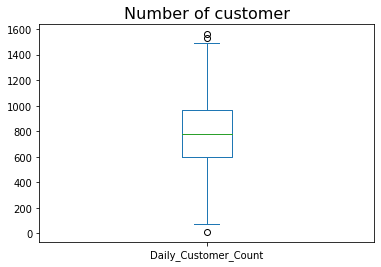

In [56]:
df_store['Daily_Customer_Count'].plot(kind='box')
plt.title('Number of customer', size=16)
plt.show()

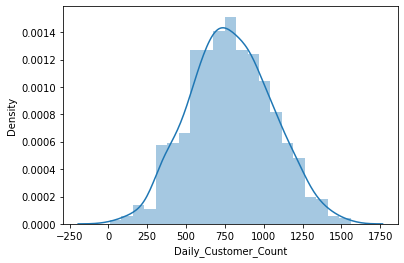

In [57]:
sns.distplot(df_store['Daily_Customer_Count'])

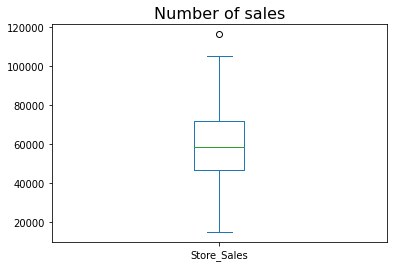

In [58]:
df_store['Store_Sales'].plot(kind='box')
plt.title('Number of sales', size=16)
plt.show()

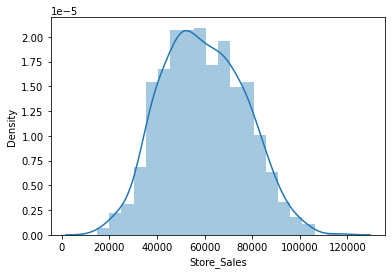

In [59]:
sns.distplot(df_store['Store_Sales'])

In [29]:
from sklearn.preprocessing import StandardScaler  # We use StandardScaler for scaling data

In [60]:
X=df_store.values[:,:]
X.shape

(896, 4)

In [61]:
features=['Store_Area','Items_Available','Daily_Customer_Count','Store_Sales']

In [62]:
X=np.nan_to_num(X)

In [63]:
df_store_scaling=StandardScaler().fit_transform(X)
df_store_scaling

array([[ 0.69409138,  0.59713547, -0.9664807 ,  0.41549581],
       [-0.09760039, -0.10021771, -2.17293004, -1.13678713],
       [-0.58141204, -0.57735409, -0.25015141, -0.31088181],
       ...,
       [-1.1411941 , -1.15458901,  1.03170101,  0.99461899],
       [-0.74534821, -0.74084837, -0.0616437 ,  2.16858025],
       [-1.24515363, -1.17794534,  1.22020871, -0.29167471]])

In [38]:
df_store = pd.DataFrame(data=df_store, columns=features)

In [64]:
from sklearn.cluster import KMeans
clstr_nums = 3
k_means = KMeans(init="k-means++", n_clusters=clstr_nums, n_init=12)
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [65]:
k_means_lbl = k_means.labels_ # We define the label for clustering
k_means_lbl

array([2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0,
       1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2,

In [67]:
k_means_cltr_cntr = k_means.cluster_centers_  # We determine the cluster center
k_means_cltr_cntr

array([[ 1505.00816327,  1805.5877551 ,   787.2244898 , 80997.63265306],
       [ 1454.55892256,  1744.03030303,   776.43097643, 40528.75420875],
       [ 1497.72881356,  1797.62146893,   794.06779661, 60161.89265537]])

In [68]:
df_store['CLUSTER']=k_means_lbl  # We merge "CLUSTER" colomn to dataframe
df_store.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,CLUSTER
0,1659,1961,530,66490,2
1,1461,1752,210,39820,1
2,1340,1609,720,54010,2
3,1451,1748,620,53730,2
4,1770,2111,450,46620,1


In [69]:
df_store['CLUSTER'].value_counts()

2    354
1    297
0    245
Name: CLUSTER, dtype: int64

In [70]:
df_store.groupby('CLUSTER').mean() 

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
CLUSTER,,,,
0,1505.008163,1805.587755,787.224490,80997.632653
1,1454.558923,1744.030303,776.430976,40528.754209
2,1497.728814,1797.621469,794.067797,60161.892655


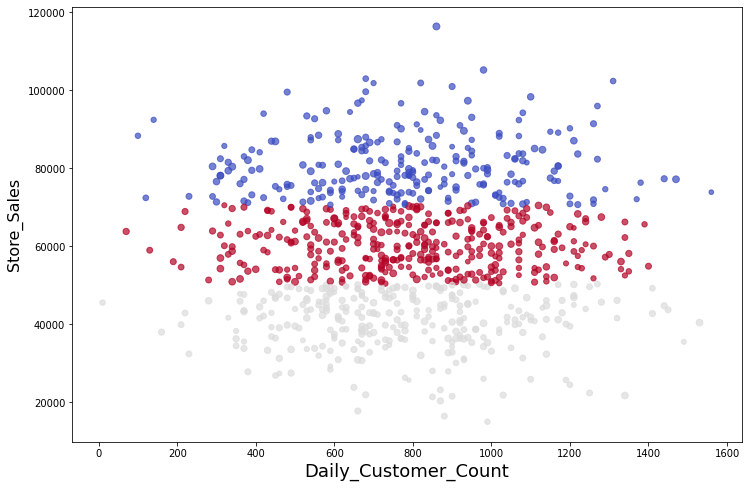

In [71]:
plt.figure(figsize=(12,8))
area = df_store["Items_Available"]/50
plt.scatter(df_store['Daily_Customer_Count'], df_store['Store_Sales'], s=area, c=df_store['CLUSTER'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Daily_Customer_Count', fontsize=18)
plt.ylabel('Store_Sales', fontsize=16)
plt.show()